<a href="https://colab.research.google.com/github/Philocreation/My_Machine_Learning/blob/main/Template/K_Nearset_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

copy from : https://www.youtube.com/watch?v=R9hx09guvzA&list=PL7ZVZgsnLwEEd3-h-jySLz4wT154r7VVr&index=6

# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt


In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE 
from sklearn.datasets import load_iris, load_breast_cancer, load_boston
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

In [4]:
iris = load_iris()

In [6]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [10]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [11]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
print("학습 데이터 점수 = {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 = {}".format(model.score(X_test,y_test)))

학습 데이터 점수 = 0.9583333333333334
평가 데이터 점수 = 1.0


In [15]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [18]:
print("학습 데이터 점수 = {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 = {}".format(model.score(X_test,y_test)))

학습 데이터 점수 = 0.35833333333333334
평가 데이터 점수 = 0.23333333333333334


In [19]:
cross_validate(
    estimator= KNeighborsClassifier(),
    X=X,y=y,
    cv= 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.0016942 , 0.00151491, 0.00498199, 0.00111604, 0.00095797]),
 'score_time': array([0.00353622, 0.00312638, 0.00293899, 0.00287867, 0.00217319]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [23]:
param_grid = [{'n_neighbors':[3,5,7],
               'weights' : ['uniform','distance'],
               'algorithm': ['ball_tree','kd_tree','brute']}]

In [24]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [25]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [26]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [27]:
print("GridSearchCV best score: {}".format(gs.best_score_))

GridSearchCV best score: 0.9800000000000001


In [46]:
def make_meshgrid(x,y, h=0.2):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contour(xx, yy, Z, **params)

  return out

In [40]:
tsne = TSNE(n_components=2)
x_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [41]:
iris_comp_df = pd.DataFrame(data=x_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-13.405791,-17.789230,0
1,-12.920443,-20.483147,0
2,-14.036387,-20.370785,0
3,-13.675611,-20.814510,0
4,-12.998163,-17.760851,0
...,...,...,...
145,5.491840,13.563313,2
146,5.565012,10.368434,2
147,5.365909,12.657120,2
148,6.299253,14.033625,2


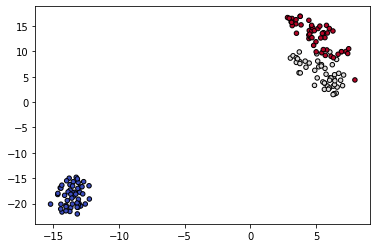

In [42]:
plt.scatter(x_comp[:,0],x_comp[:,1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [43]:
model = KNeighborsClassifier()
model.fit(x_comp, y)
predict = model.predict(x_comp)

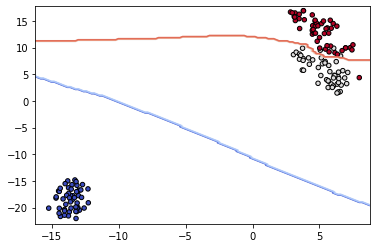

In [49]:
xx, yy = make_meshgrid(x_comp[:,0], x_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_comp[:,0], x_comp[:,1], c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k')

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과